Assignment:
This is data a client collected by hosting an Autism screening questionnaire on their website over the course of several months. Some of the variables are the results of individual screening questions (e.g. A1_Score), and others are information about the "patient" (e.g. Country_of_res). Your task is to determine which factors are most influential in predicting whether someone has ASD (Autism Spectrum Disorder), and to assess how predictable ASD is overall given the features collected in this dataset. Please remember that the focus of this challenge is on how you approach the problem, do exploratory analysis, and choose which predictors are appropriate to use, not on how thoroughly you perform hyperparameter tuning or on the number of different models you test, for example. Please also remember that we are not looking for a powerpoint presentation, and that "walking through" your code is completely appropriate.

# Autism Spectrum Disorder Case Study
#### Examining any relationship between personal factors and ASD diagnosis

### 1. Clean and Examine The Data

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
asdfile = pd.read_csv('Autism-Adult-Data.csv')
asdfile.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,App_result,Age_desc,Relation,ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [3]:
asdfile.shape

(704, 21)

In [4]:
asdfile.describe

<bound method NDFrame.describe of      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ... G

For ease of usage I would like to edit some of the types of answers within the columns

In [5]:
#examine what factors we have obtained
asdfile.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jundice', 'Family', 'Country_of_res', 'Used_app_before',
       'App_result', 'Age_desc', 'Relation', 'ASD'],
      dtype='object')

In [6]:
asdfile.Ethnicity.unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [7]:
#There is no discerneable difference for us between '?', 'Others', and 'Other' 
#They need to be reclassified as just one type

asdfile.Ethnicity = asdfile.Ethnicity.replace({'?':'Others','others':'Others'})

In [8]:
#Check for any issues 
asdfile.Ethnicity.unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish'], dtype=object)

In [9]:
# Double check there aren't any misspelling issues or multiple classifications for one gender 
# i.e. 'f' vs 'F' vs 'Fem'
asdfile.Gender.unique()

array(['f', 'm'], dtype=object)

In [10]:
# United States is oddly formated. Checking all of the different types.
asdfile.Country_of_res.unique()

array(["'United States'", 'Brazil', 'Spain', 'Egypt', "'New Zealand'",
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       "'United Arab Emirates'", 'Afghanistan', 'Lebanon',
       "'United Kingdom'", "'South Africa'", 'Italy', 'Pakistan',
       'Bangladesh', 'Chile', 'France', 'China', 'Australia', 'Canada',
       "'Saudi Arabia'", 'Netherlands', 'Romania', 'Sweden', 'Tonga',
       'Oman', 'India', 'Philippines', "'Sri Lanka'", "'Sierra Leone'",
       'Ethiopia', "'Viet Nam'", 'Iran', "'Costa Rica'", 'Germany',
       'Mexico', 'Russia', 'Armenia', 'Iceland', 'Nicaragua',
       "'Hong Kong'", 'Japan', 'Ukraine', 'Kazakhstan', 'AmericanSamoa',
       'Uruguay', 'Serbia', 'Portugal', 'Malaysia', 'Ecuador', 'Niger',
       'Belgium', 'Bolivia', 'Aruba', 'Finland', 'Turkey', 'Nepal',
       'Indonesia', 'Angola', 'Azerbaijan', 'Iraq', "'Czech Republic'",
       'Cyprus'], dtype=object)

In [11]:
# As the file is not incredibly long instead of finding the different countries that
# have unnecessary quotation marks I will just strip them in and of themselves instead of
# renaming by country name
for x in range(len(asdfile)):
    asdfile['Country_of_res'][x] = asdfile['Country_of_res'][x].replace("'",'') 

<ipython-input-11-81a0205883ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# Check work
asdfile.Country_of_res.unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

In [13]:
# Check for missing data files
asdfile.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
Age                0
Gender             0
Ethnicity          0
Jundice            0
Family             0
Country_of_res     0
Used_app_before    0
App_result         0
Age_desc           0
Relation           0
ASD                0
dtype: int64

In [14]:
# What is app_result?
# Since it seems to be organized numbers 0-10. I need to ask client for meaning.
asdfile.App_result.unique()

array([ 6,  5,  8,  2,  9, 10,  4,  3,  0,  1,  7])

Outside of preprocessing of categorical variables for machine learning (which I will do in part 3 I'm now satisfied that missing values and spelling errors will not plague our data. The data is clean enough for exploratory data analysis

### 2. Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

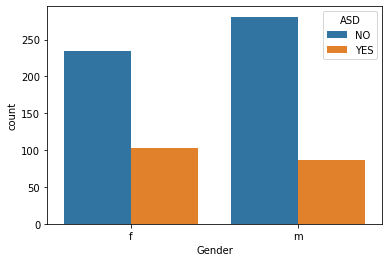

In [15]:
sns.countplot(x='Gender', hue = 'ASD', data = asdfile)

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

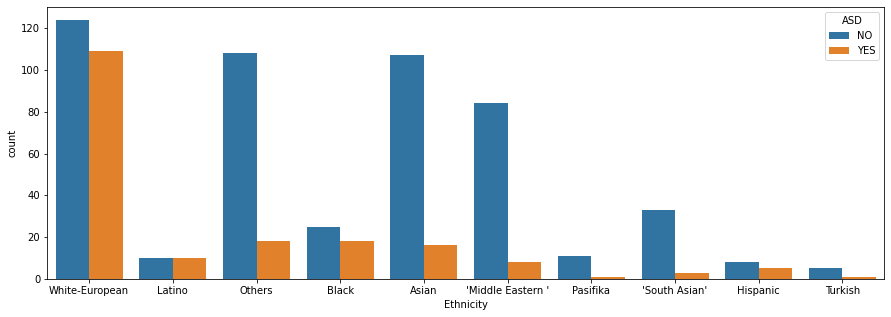

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Ethnicity', hue = 'ASD', data = asdfile)

In [17]:
#Find and visualize the most common and least common countries for replies.